In [32]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

from plot_utils import *
import sys
sys.path.append("../")
from difficulty.metrics.metric_utils import combine_metrics_into_df, average_columns


EXPLAINED_VAR_CUTOFF = 0.99


def plot_explained_var(ax, pca, title=""):
    sum = 0
    for i, var, in enumerate(pca.explained_variance_ratio_):
        ax.barh(0, var, color=CMAP(i / len(pca.explained_variance_ratio_)), left=sum)
        sum += var


def pca_over_metrics(metrics_dir, use_median, use_rank):
    df, metrics, (_, models, replicates) = combine_metrics_into_df(metrics_dir)
    metrics = order_metrics(metrics)
    models = order_models(models)
    # prepare subplots
    fig = plt.figure(figsize=(6 * len(models), 4 * 2), constrained_layout=True)
    grid = matplotlib.gridspec.GridSpec(2, len(models), figure=fig, height_ratios=[len(metrics), 1])
    legend_values = []
    for i, (model, shortname) in enumerate(models.items()):
        # get average value
        avg_df = average_over_replicates(df, model, metrics, use_median=use_median)
        if use_rank:
            avg_df = make_ranks(avg_df).to_numpy()
        else:
            avg_df = scale(avg_df.to_numpy(), axis=0)  # make all features (metrics) the same scale
        # principal components
        pca = PCA()
        transformed = pca.fit_transform(avg_df)
        n_components = np.searchsorted(np.cumsum(pca.explained_variance_ratio_), EXPLAINED_VAR_CUTOFF, side="right")
        assert n_components <= pca.n_components_
        # plot components
        ax = fig.add_subplot(grid[0, i])
        plot_heatmap_tiles(ax, pca.components_[:n_components, :].T,
            x_labels=(np.arange(n_components) + 1), y_labels=metrics, title=shortname)
        # stacked bar plot of explained variances per component
        ax = fig.add_subplot(grid[1, i])
        plot_explained_var(ax, pca, title=shortname)
    fig.show()

/tmp/ipykernel_48909/3236798699.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


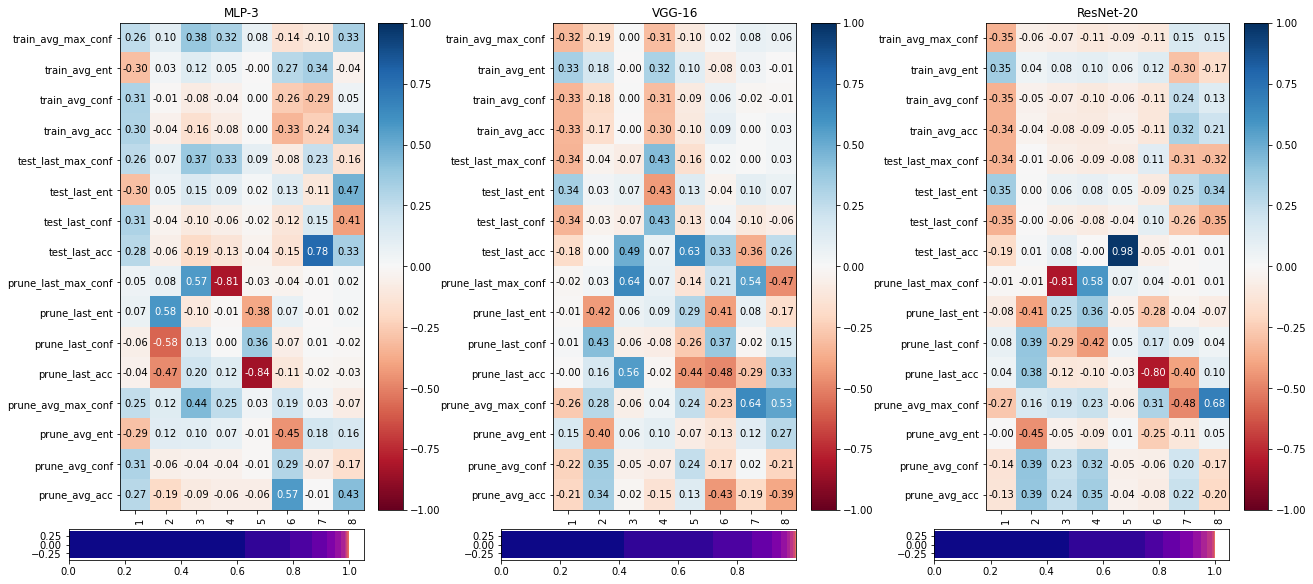

In [25]:
metrics_by_architecture = Path("../outputs")
pca_over_metrics(metrics_by_architecture, use_median=False, use_rank=True)

/tmp/ipykernel_48909/2542413606.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


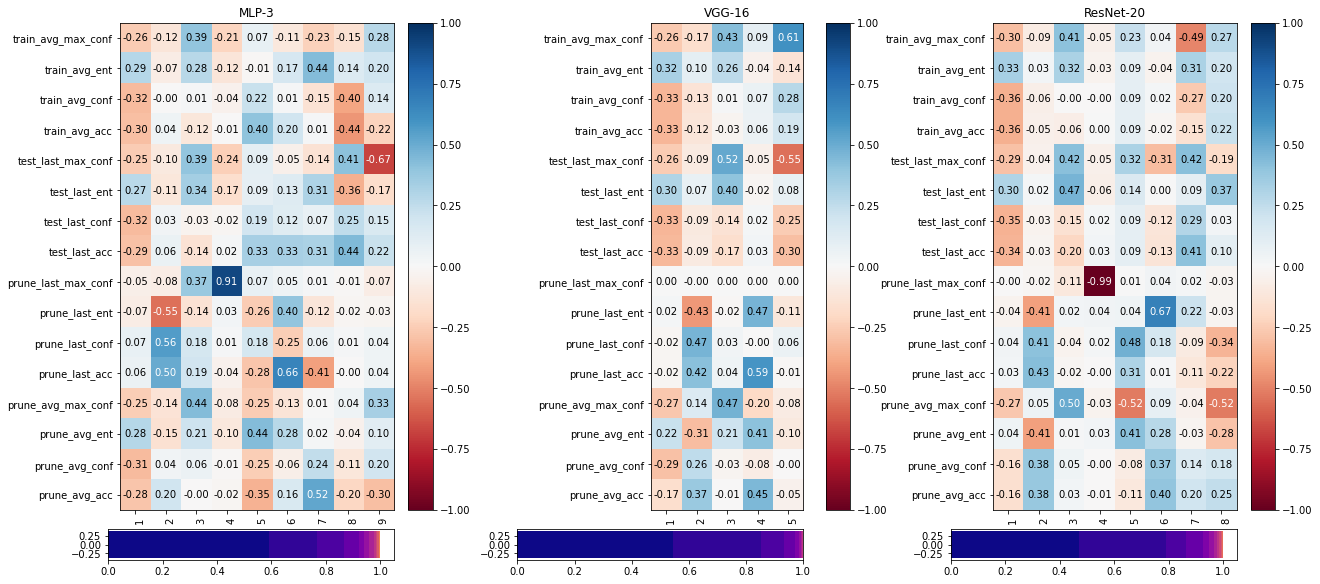

In [33]:
pca_over_metrics(metrics_by_architecture, use_median=False, use_rank=False)

/tmp/ipykernel_48909/3610373528.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


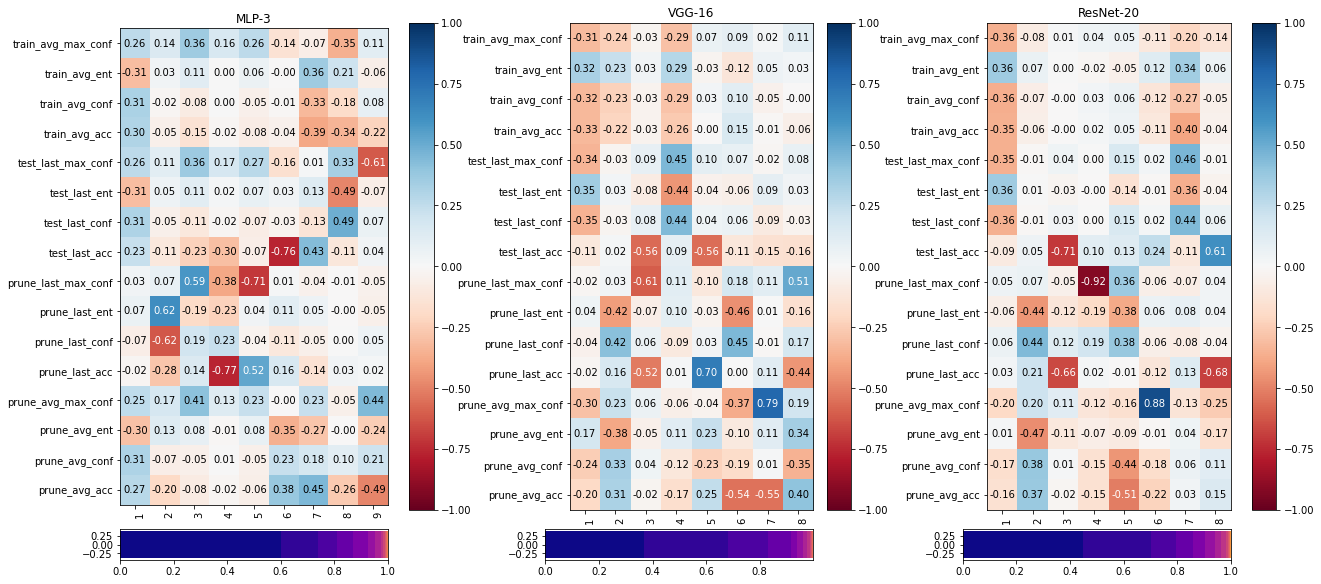

In [18]:
pca_over_metrics(metrics_by_architecture, use_median=True, use_rank=True)

/tmp/ipykernel_48909/2542413606.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


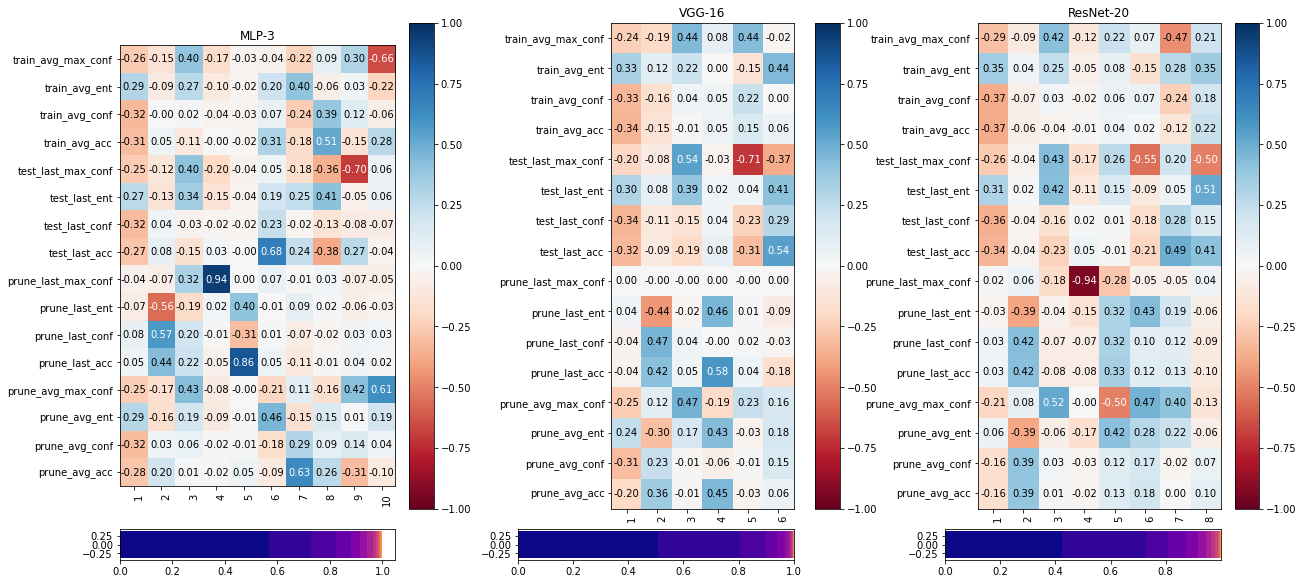

In [34]:
pca_over_metrics(metrics_by_architecture, use_median=True, use_rank=False)